# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#reading the dataset
df = pd.read_csv('kidney_data.csv')
print(df.shape)
#showing first few rows of the dataset
df.head()

(400, 27)


,Unnamed: 0,id,age,bp,sg,al,su,rbc,pc,pcc,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,0,40,3,3,1,0,1,1,0,...,30,69,33,1,2,0,0,0,0,0
1,1,1,5,0,3,4,0,1,1,0,...,24,53,33,0,1,0,0,0,0,0
2,2,2,54,3,1,2,3,1,1,0,...,17,67,33,0,2,0,1,0,1,0
3,3,3,40,2,0,4,0,1,0,1,...,18,59,18,1,1,0,1,1,1,0
4,4,4,43,3,1,2,0,1,1,0,...,21,65,26,0,1,0,0,0,0,0


In [3]:
df = df.drop(columns=['Unnamed: 0','id'])

In [4]:
#checking missing values per feature
df.isna().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [5]:
df['classification'].value_counts()

classification
0    250
1    150
Name: count, dtype: int64

# Balancing the target variable

In [6]:
x = df.drop('classification',axis='columns')
y = df['classification']

In [7]:
y.value_counts()

classification
0    250
1    150
Name: count, dtype: int64

In [8]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_sm , y_sm = smote.fit_resample(x,y)

y_sm.value_counts()

classification
0    250
1    250
Name: count, dtype: int64

In [9]:
x_sm.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,40,3,3,1,0,1,1,0,0,48,...,90,30,69,33,1,2,0,0,0,0
1,5,0,3,4,0,1,1,0,0,26,...,49,24,53,33,0,1,0,0,0,0
2,54,3,1,2,3,1,1,0,0,140,...,32,17,67,33,0,2,0,1,0,1
3,40,2,0,4,0,1,0,1,0,44,...,48,18,59,18,1,1,0,1,1,1
4,43,3,1,2,0,1,1,0,0,33,...,52,21,65,26,0,1,0,0,0,0


# splitting train test data

In [10]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.2,stratify=y_sm, random_state = 40)

## checking distribution of traget variable in train test split
print('Distribution of traget variable in training set')
print(y_train.value_counts())

print('Distribution of traget variable in test set')
print(y_test.value_counts())

Distribution of traget variable in training set
classification
0    200
1    200
Name: count, dtype: int64
Distribution of traget variable in test set
classification
0    50
1    50
Name: count, dtype: int64


In [11]:
lr = LogisticRegression(random_state = 0, penalty = 'l2')
lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

# 10-Fold Cross-Validation

In [12]:
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'

acc_lr = cross_val_score(estimator = lr, X = x_train, y = y_train, cv = kfold,scoring=scoring)
acc_lr.mean()

0.9724999999999999

# Model Evaluation

In [13]:
y_predict_logi = lr.predict(x_test)
acc= accuracy_score(y_test, y_predict_logi)
roc=roc_auc_score(y_test, y_predict_logi)
prec = precision_score(y_test, y_predict_logi)
rec = recall_score(y_test, y_predict_logi)
f1 = f1_score(y_test, y_predict_logi)

results = pd.DataFrame([['Logistic Regression',acc, acc_lr.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.99,0.9725,0.980392,1.0,0.990099,0.99


# confusion Matrix

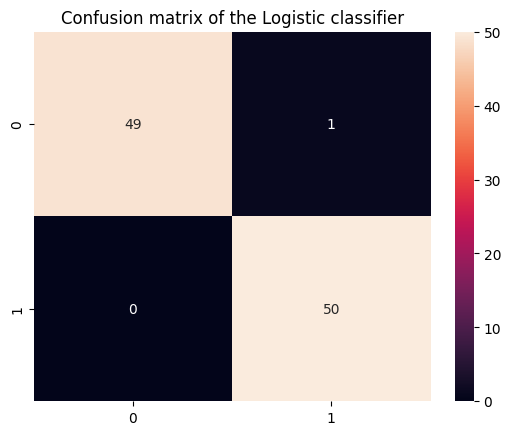

In [14]:
cm_logi = confusion_matrix(y_test, y_predict_logi)
plt.title('Confusion matrix of the Logistic classifier')
sns.heatmap(cm_logi,annot=True,fmt="d")
plt.show()

# Plotting Feature Importance – Logistic Regression

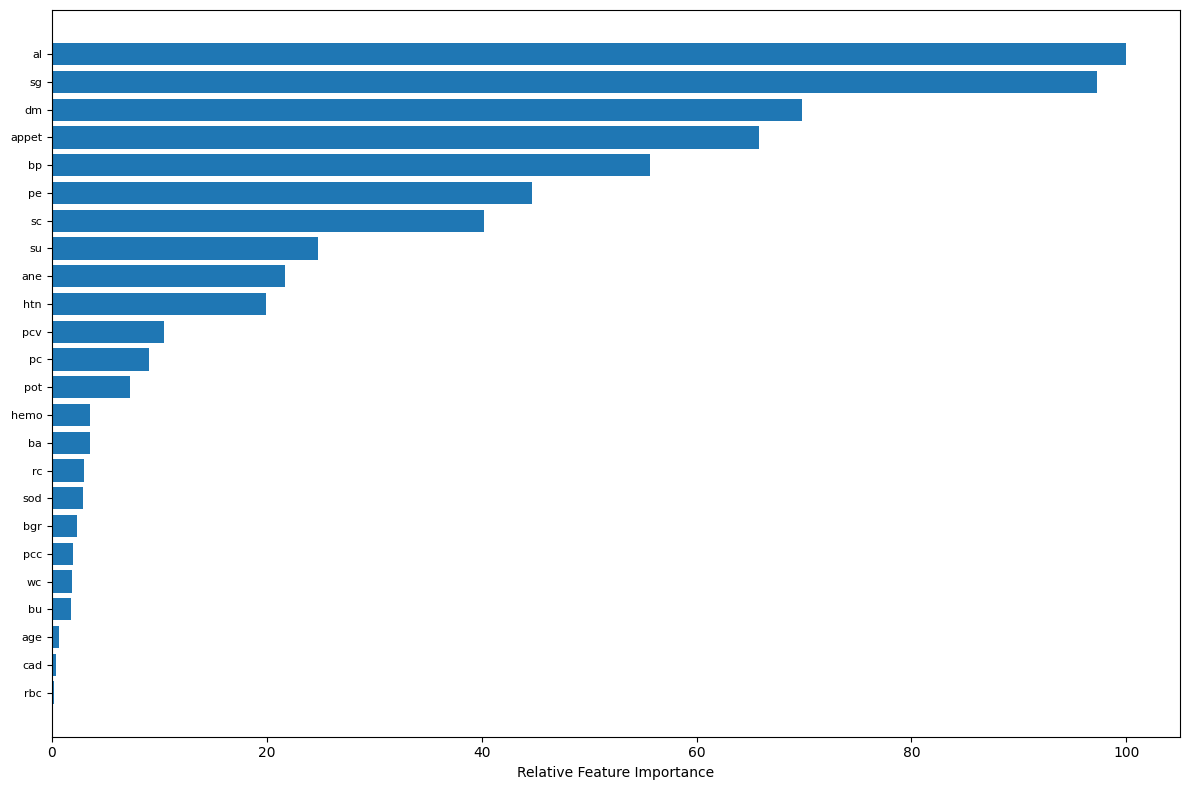

In [15]:
#plotting feature importance
feature_importance = abs(lr.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .3

featfig = plt.figure(figsize=(12,8))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(x_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

# 2.Random forest Classifier

In [16]:
rf = RandomForestClassifier(criterion='gini',n_estimators=100)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [17]:
# Cross Validation

In [18]:
kfold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'

acc_rf = cross_val_score(estimator = rf, X = x_train, y = y_train, cv = kfold,scoring=scoring)
acc_rf.mean()

0.9974999999999999

# Model Evaluation

In [19]:
y_predict_r = rf.predict(x_test)
roc=roc_auc_score(y_test, y_predict_r)
acc = accuracy_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)

model_results = pd.DataFrame([['Random Forest (Untuned)',acc, acc_rf.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = pd.concat([results,model_results])
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.99,0.9725,0.980392,1.0,0.990099,0.99
0,Random Forest (Untuned),1.00,0.9975,1.000000,1.0,1.000000,1.00


# Feature Importance – Random Forest

<Axes: >

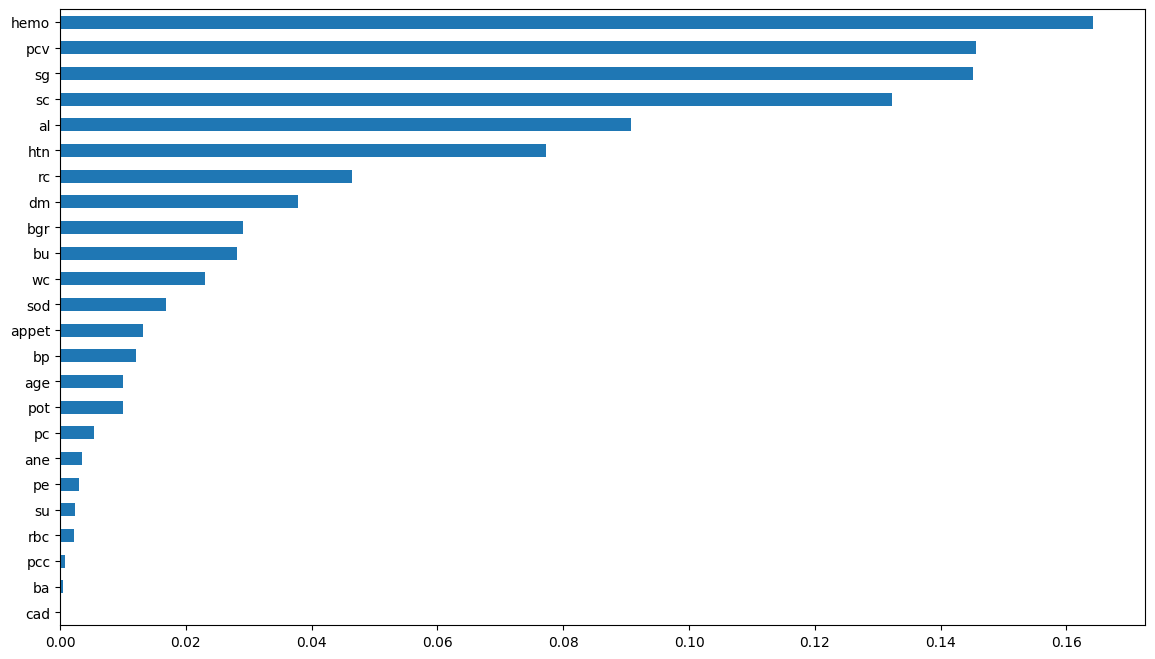

In [20]:
feat_importances = pd.Series(rf.feature_importances_, index=x_train.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(14, 8))